<a href="https://colab.research.google.com/github/PrachiJadhav12/Product-Classification/blob/main/Product_categorization_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import re 
import nltk 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, naive_bayes, svm

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Set/flipkart_com-ecommerce_sample.csv")

In [ ]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
df.shape

(20002, 15)

In [ ]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
df[df['description'].isnull()].index

Int64Index([553, 17299, 20000, 20001], dtype='int64')

In [ ]:
print(df['description'][553])

nan


In [ ]:
print(df['description'][17299])

nan


In [ ]:
print(df['description'][20000])

nan


In [ ]:
print(df['description'][20001])

nan


In [ ]:
df.drop([553, 17299,20000,20001] , inplace = True)

In [ ]:
df.shape

(19998, 15)

In [ ]:
print(df['description'][39])

Specifications of Oye Boy's Dungaree Top Details Number of Contents in Sales Package Pack of 1 Fabric Cotton Type Dungaree General Details Pattern Solid Ideal For Boy's In the Box 1 Dungaree


In [ ]:
def preprocessing_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form

In [ ]:
'''
    Lets see how our string look after we appply the "preprocessing_string" function on it.
'''
print(df["description"][0])
print('\n')
print(preprocessing_string(df["description"][0]))

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


key features of alisha solid women s cycling shorts cotton lycra navy red navy specifications of alisha solid women s cycling shorts shorts details number of contents in sales package pack of fabric cotton lycra type cycling shorts general details pattern solid ideal for women s fabric care gentle machine wash in lukewarm water do not bleach additional details style code altht p in the box shorts


In [ ]:
#lets look at the product_category_tree column
df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 19998, dtype: object

In [ ]:
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())

In [ ]:
print(df['product_category_tree'][50])
print(df["product_category_tree"][0])

Vishudh Printed Women's Straight Kurta"]
Clothing


In [ ]:
#Total number of uniques "parent"
df['product_category_tree'].nunique()

266

In [ ]:
#Printing out all the unique categories
df['product_category_tree'].unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet Supplies',
       'Eternal Gandhi Super Series Crystal Paper Weight..."]',
       'Pens & Stationery', 'Sports & Fitness',
       'Beauty and Personal Care',
       'Bengal Blooms Rose Artificial Plant  with Pot (3..."]',
       'Bags, Wallets & Belts', 'Home Decor & Festive Needs',
       'Automotive', 'Tools & Hardware',
       'Vishudh Printed Women\'s Straight Kurta"]',
       'Vishudh Printed Women\'s Anarkali Kurta"]',
       'BuildTrack PIR Wireless Motion Sensor - One Swit..."]',
       'Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTROLLER..."]',
       'MASARA Solid Women\'s Straight Kurta"]',
       'Skayvon SUBMERSIBBLE THREE PHASE PUMP CONTROLLER..."]',
       'Behringer Xenyx 502 Analog Sound Mixer"]',
       'Noor Embroidered Women\'s Straight Kurta"]',
       'Libas Printed Women\'s A-line Kurta"]',
       'Libas Printed Women\'s Anarkali Kurta"]', 'Home Furnishing',
       'Baby Care', 'Mobiles & Accessories', 'Food & Nutriti

In [ ]:
print(df['product_category_tree'][50])

Vishudh Printed Women's Straight Kurta"]


In [ ]:
# Taking only top categories
top_cat = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)

In [ ]:
print(top_cat)

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Computers', 'Watches', 'Baby Care', 'Tools & Hardware', 'Toys & School Supplies', 'Pens & Stationery', 'Bags, Wallets & Belts', 'Furniture', 'Sports & Fitness', 'Cameras & Accessories', 'Home Improvement', 'Health & Personal Care Appliances', 'Sunglasses', 'Gaming', 'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'eBooks', 'Eyewear']


In [ ]:
processed_df = df[df['product_category_tree'].isin(top_cat)][['product_category_tree','description']]

In [ ]:
processed_df

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...
...,...,...
19995,Baby Care,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19996,Baby Care,Buy Wallmantra Large Vinyl Stickers Sticker fo...
19997,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...
19998,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...


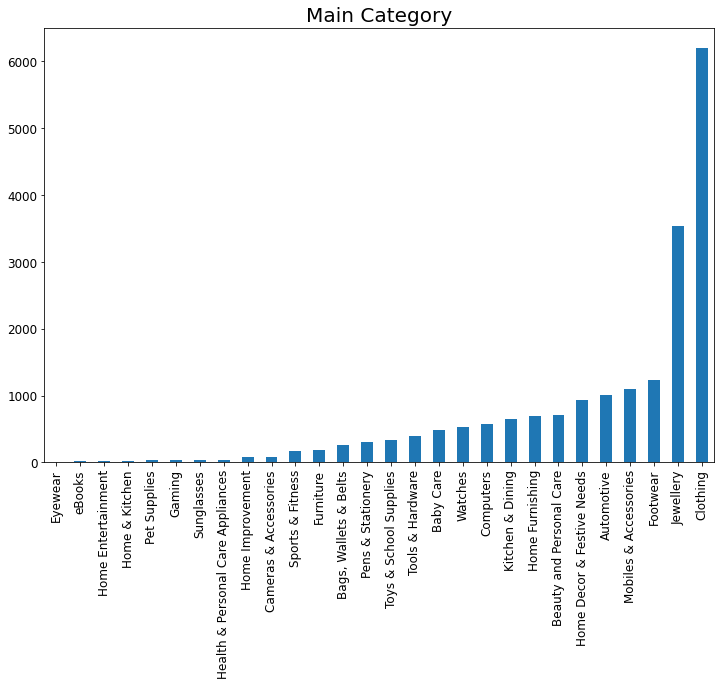

Top Main Categories by Sales.

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             35
Gaming                                 35
Pet

In [ ]:
plt.figure(figsize=(12,8))
df['product_category_tree'].value_counts()[:28].sort_values(ascending=True).plot(kind='bar')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Main Categories by Sales.\n')
print(df['product_category_tree'].value_counts()[:28])

In [ ]:

# Cleaning strings
processed_df['description'] = processed_df['description'].astype('str').apply(preprocessing_string)

In [ ]:
processed_df

,product_category_tree,description
0,Clothing,key features of alisha solid women s cycling s...
1,Furniture,fabhomedecor fabric double sofa bed finish col...
2,Footwear,key features of aw bellies sandals wedges heel...
3,Clothing,key features of alisha solid women s cycling s...
4,Pet Supplies,specifications of sicons all purpose arnica do...
...,...,...
19995,Baby Care,buy walldesign small vinyl sticker for rs onli...
19996,Baby Care,buy wallmantra large vinyl stickers sticker fo...
19997,Baby Care,buy elite collection medium acrylic sticker fo...
19998,Baby Care,buy elite collection medium acrylic sticker fo...


In [ ]:
# Creating a list of categories for later use
cat_list = list(processed_df['product_category_tree'].unique())

In [ ]:
# Printing the list of top categories
print(cat_list)

['Clothing', 'Furniture', 'Footwear', 'Pet Supplies', 'Pens & Stationery', 'Sports & Fitness', 'Beauty and Personal Care', 'Bags, Wallets & Belts', 'Home Decor & Festive Needs', 'Automotive', 'Tools & Hardware', 'Home Furnishing', 'Baby Care', 'Mobiles & Accessories', 'Watches', 'Toys & School Supplies', 'Jewellery', 'Kitchen & Dining', 'Home & Kitchen', 'Computers', 'Cameras & Accessories', 'Health & Personal Care Appliances', 'Gaming', 'Home Improvement', 'Sunglasses', 'Home Entertainment', 'Eyewear', 'eBooks']


In [ ]:
# Encoding the product category
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded

In [ ]:
#Printing the encoded value and their corresponding values
for i in range(28):
    print(str(i) + "-" + le.inverse_transform([i]))

['0-Automotive']
['1-Baby Care']
['2-Bags, Wallets & Belts']
['3-Beauty and Personal Care']
['4-Cameras & Accessories']
['5-Clothing']
['6-Computers']
['7-Eyewear']
['8-Footwear']
['9-Furniture']
['10-Gaming']
['11-Health & Personal Care Appliances']
['12-Home & Kitchen']
['13-Home Decor & Festive Needs']
['14-Home Entertainment']
['15-Home Furnishing']
['16-Home Improvement']
['17-Jewellery']
['18-Kitchen & Dining']
['19-Mobiles & Accessories']
['20-Pens & Stationery']
['21-Pet Supplies']
['22-Sports & Fitness']
['23-Sunglasses']
['24-Tools & Hardware']
['25-Toys & School Supplies']
['26-Watches']
['27-eBooks']


In [ ]:
processed_df.head()

,product_category_tree,description
0,5,key features of alisha solid women s cycling s...
1,9,fabhomedecor fabric double sofa bed finish col...
2,8,key features of aw bellies sandals wedges heel...
3,5,key features of alisha solid women s cycling s...
4,21,specifications of sicons all purpose arnica do...


In [ ]:
#Shape of processed_df
processed_df.shape

(19661, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13172,)
(13172,)
(6489,)
(6489,)


In [ ]:
print(X_train.head())

11158    jazzup women s leggings price rs gift yourself...
4261     voylla yellow gold plated alloy necklace buy v...
18897    manirathnum star diopside gemstone gemstone si...
453      urban fashion bank casual sleeve solid women s...
9734     zink london casual short sleeve solid women s ...
Name: description, dtype: object


In [ ]:

print(y_train.head())

11158     5
4261     17
18897    17
453       5
9734      5
Name: product_category_tree, dtype: int64


In [ ]:
# Instantiating the vectorizer and removing stop words
vect = CountVectorizer(analyzer='word', stop_words = 'english')
# Converting the train data
X_train_matrix = vect.fit_transform(X_train) 

In [ ]:
# vect.get_feature_names()
X_train_matrix.shape

(13172, 16511)

In [ ]:
vect.vocabulary_

{'jazzup': 7530,
 'women': 16180,
 'leggings': 8281,
 'price': 11263,
 'rs': 12390,
 'gift': 6045,
 'trendy': 15071,
 'comfortable': 2896,
 'ease': 4446,
 'day': 3627,
 'long': 8531,
 'time': 14787,
 'look': 8542,
 'stunning': 14085,
 'voylla': 15819,
 'yellow': 16356,
 'gold': 6163,
 'plated': 10902,
 'alloy': 470,
 'necklace': 9732,
 'buy': 2043,
 'flipkart': 5550,
 'com': 2870,
 'genuine': 5995,
 'products': 11334,
 'replacement': 12028,
 'guarantee': 6337,
 'free': 5741,
 'shipping': 13038,
 'cash': 2252,
 'delivery': 3760,
 'manirathnum': 8831,
 'star': 13836,
 'diopside': 4026,
 'gemstone': 5970,
 'silver': 13214,
 'ring': 12222,
 'sterling': 13901,
 'na': 9632,
 'brass': 1812,
 'urban': 15434,
 'fashion': 5224,
 'bank': 1189,
 'casual': 2267,
 'sleeve': 13349,
 'solid': 13538,
 'blue': 1602,
 'black': 1512,
 'online': 10119,
 'india': 7142,
 'shop': 13076,
 'apparels': 694,
 'huge': 6883,
 'collection': 2833,
 'branded': 1800,
 'clothes': 2729,
 'zink': 16457,
 'london': 8528,
 

In [ ]:
# Instantiate a Multinomial Naive Bayes model
model=MultinomialNB()

# Train the model
model.fit(X_train_matrix, y_train)

# Scoring the trained model
print("Accuracy of model on training data:" , model.score(X_train_matrix, y_train))

Accuracy of model on training data: 0.9489067719404798


In [ ]:
'''
This code block is for predicting & scoring test data

'''

# Converting the test data
X_test_matrix = vect.transform(X_test) 

# Scoring for the test data
print ("Accuracy of model on testing data:", model.score(X_test_matrix, y_test))

Accuracy of model on testing data: 0.9281861611958699


In [ ]:
'''
Time taken by our model for traing 
'''
%time model.fit(X_train_matrix, y_train)

CPU times: user 21.7 ms, sys: 4.03 ms, total: 25.7 ms
Wall time: 26.1 ms


MultinomialNB()

In [ ]:
# Printing score 
predicted_result=model.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       333
           1       0.89      0.60      0.71       174
           2       0.79      0.64      0.71        85
           3       0.80      0.91      0.85       215
           4       1.00      0.12      0.21        34
           5       0.98      0.99      0.99      1999
           6       0.88      0.78      0.83       216
           7       1.00      1.00      1.00         4
           8       0.97      0.98      0.97       396
           9       0.98      0.98      0.98        65
          10       0.80      0.89      0.84         9
          11       1.00      0.71      0.83        14
          12       1.00      0.27      0.43        11
          13       0.90      0.99      0.94       288
          14       1.00      0.14      0.25         7
          15       0.93      0.98      0.95       244
          16       1.00      0.42      0.59        24
          17       0.87    

In [ ]:
'''
This code block is for converting the training data to Tf-Idf form

'''
# Removing stop words
vectorizer = TfidfVectorizer(analyzer = 'word' , stop_words = 'english')
# Converting the train data
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
'''
This code block is for training

'''
# Instantiate a Multinomial Naive Bayes model
model2=MultinomialNB()

# Fitting to multinomial NB model
model2.fit(X_train_tfidf, y_train)

# Scoring the trained model (Expected to be above 95 percent)
print("Accuracy of model on training data:" , model2.score(X_train_tfidf, y_train))

Accuracy of model on training data: 0.8761767385362891


In [ ]:
'''
This code block is for predicting & scoring test data

'''
# Converting the test data
X_test_tfidf = vectorizer.transform(X_test) 

# Printing score
print ("Accuracy of model on testing data:" , model2.score(X_test_tfidf, y_test))

Accuracy of model on testing data: 0.849283402681461


In [ ]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , logreg.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9537679149329634
Accuracy of model on training data: 0.9726692985119951
                                   precision    recall  f1-score   support

                         Clothing       0.95      0.98      0.96       333
                        Jewellery       0.97      0.72      0.83       174
                         Footwear       0.87      0.84      0.85        85
            Mobiles & Accessories       0.94      0.92      0.93       215
                       Automotive       1.00      0.71      0.83        34
       Home Decor & Festive Needs       0.96      1.00      0.98      1999
         Beauty and Personal Care       0.94      0.94      0.94       216
                  Home Furnishing       0.00      0.00      0.00         4
                 Kitchen & Dining       0.96      1.00      0.98       396
                        Computers       0.98      0.88      0.93        65
                          Watches       1.00      0.67      0.80         9
                

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , sgd.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9419016797657574
Accuracy of model on training data: 0.9604464014576374
                                   precision    recall  f1-score   support

                         Clothing       0.92      0.98      0.94       333
                        Jewellery       0.90      0.49      0.64       174
                         Footwear       0.81      0.82      0.82        85
            Mobiles & Accessories       0.94      0.89      0.91       215
                       Automotive       1.00      0.74      0.85        34
       Home Decor & Festive Needs       0.95      1.00      0.97      1999
         Beauty and Personal Care       0.94      0.92      0.93       216
                  Home Furnishing       1.00      0.25      0.40         4
                 Kitchen & Dining       0.94      0.99      0.97       396
                        Computers       0.95      0.95      0.95        65
                          Watches       1.00      0.78      0.88         9
                

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svmsvc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
               ])
svmsvc.fit(X_train, y_train)

y_pred = svmsvc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))
print ("Accuracy of model on training data:" , svmsvc.score(X_train, y_train))
print(classification_report(y_test, y_pred,target_names=top_cat))

Accuracy 0.9730312837108953
Accuracy of model on training data: 0.9916489523231097
                                   precision    recall  f1-score   support

                         Clothing       0.98      0.99      0.99       333
                        Jewellery       0.95      0.83      0.89       174
                         Footwear       0.89      0.95      0.92        85
            Mobiles & Accessories       0.96      0.94      0.95       215
                       Automotive       1.00      0.91      0.95        34
       Home Decor & Festive Needs       0.99      1.00      0.99      1999
         Beauty and Personal Care       0.95      0.95      0.95       216
                  Home Furnishing       1.00      1.00      1.00         4
                 Kitchen & Dining       1.00      1.00      1.00       396
                        Computers       0.98      0.95      0.97        65
                          Watches       0.80      0.89      0.84         9
                

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#In this codeblock we are calculating the total no.of correct predictions made by our model using svm algorithm
nr_correct = (y_test == svmsvc.predict((X_test))).sum()
print(nr_correct)

6314


In [ ]:
test_desc = X_test[2344]
test_desc

'hemali pink women s t shirt bra price rs hemali multi color t shirt bra comes in pure cotton material in b cup size available in combo of assorted colors hemali multi color t shirt bra comes in pure cotton material in b cup size available in combo of assorted colors'

In [ ]:
'''
Multinomial Naive Bayes
'''
le.inverse_transform(model.predict(vect.transform([test_desc])))

array(['Clothing'], dtype=object)

In [ ]:
'''
Logistic Regression
'''
le.inverse_transform(logreg.predict([test_desc]))

array(['Clothing'], dtype=object)

In [ ]:
'''
Stochastic Gradient Descent (SGD)
'''
le.inverse_transform(sgd.predict([test_desc]))

array(['Clothing'], dtype=object)

In [76]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=a9d7a256ac39b29eb5cf08524b43780aefa0c3aea489